___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

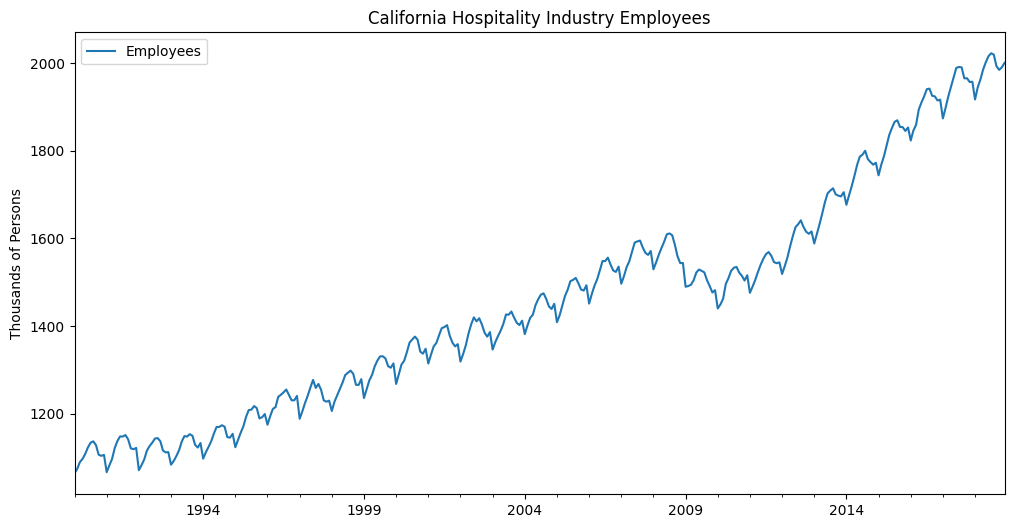

In [4]:
## CODE HERE
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''

ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title)
ax.autoscale(axis ='x', tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);


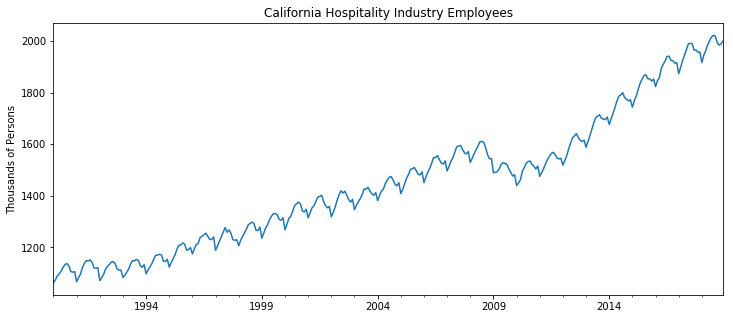

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

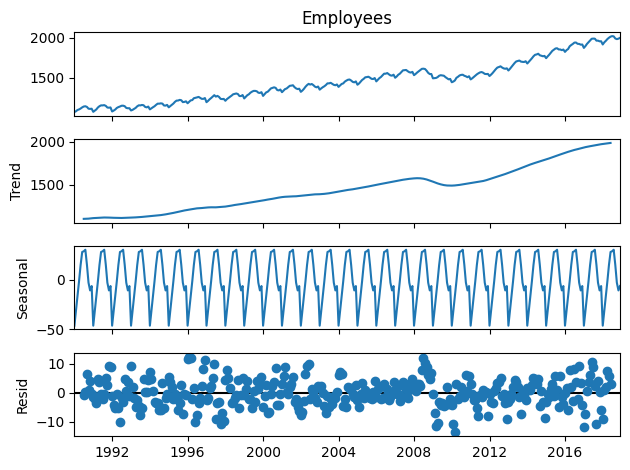

In [5]:
ets = seasonal_decompose(df['Employees'], model='add')
ets.plot();

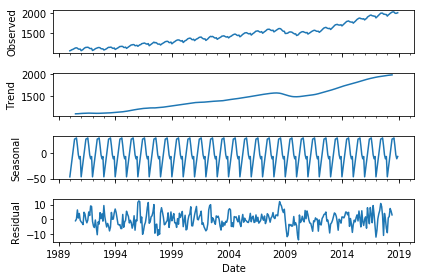

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [6]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Mon, 07 Oct 2024   AIC                           2208.504
Time:                                      21:39:48   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.633      0.000       0.837       1.012
ma.L1         -0.9441      0.070    -13.473      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.142      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.631      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.317      0.000      -0.834      -0.664
sigma2        29.3005      1.717     17.060      0.000      25.934      32.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [7]:
nobs=12
train, test = df[0:-nobs], df[-nobs:]

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [8]:
model = SARIMAX(train['Employees'], order=(1, 1, 2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05000D+00    |proj g|=  7.42739D+00

At iterate    5    f=  3.81187D+00    |proj g|=  4.90610D-02

At iterate   10    f=  3.28144D+00    |proj g|=  1.18578D-01

At iterate   15    f=  3.17018D+00    |proj g|=  1.50450D-02

At iterate   20    f=  3.15385D+00    |proj g|=  1.91763D-02

At iterate   25    f=  3.15114D+00    |proj g|=  2.91287D-03


 This problem is unconstrained.



At iterate   30    f=  3.14942D+00    |proj g|=  8.48823D-03

At iterate   35    f=  3.14898D+00    |proj g|=  5.18794D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     51      1     0     0   1.575D-05   3.149D+00
  F =   3.1489827082582331     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Mon, 07 Oct 2024   AIC                           2128.116
Time:                                      21:44:10   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.184      0.000       0.839       1.010
ma.L1         -0.9584      0.070    -13.767      0.000      -1.095      -0.822
ma.L2          0.1498      0.060      2.484      0.013       0.032       0.268
ar.S.L12       0.9973      0.001    728.906      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.156      0.000      -0.838      -0.666
sigma2        28.7657      1.684     17.079      0.000      25.465      32.067
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [9]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

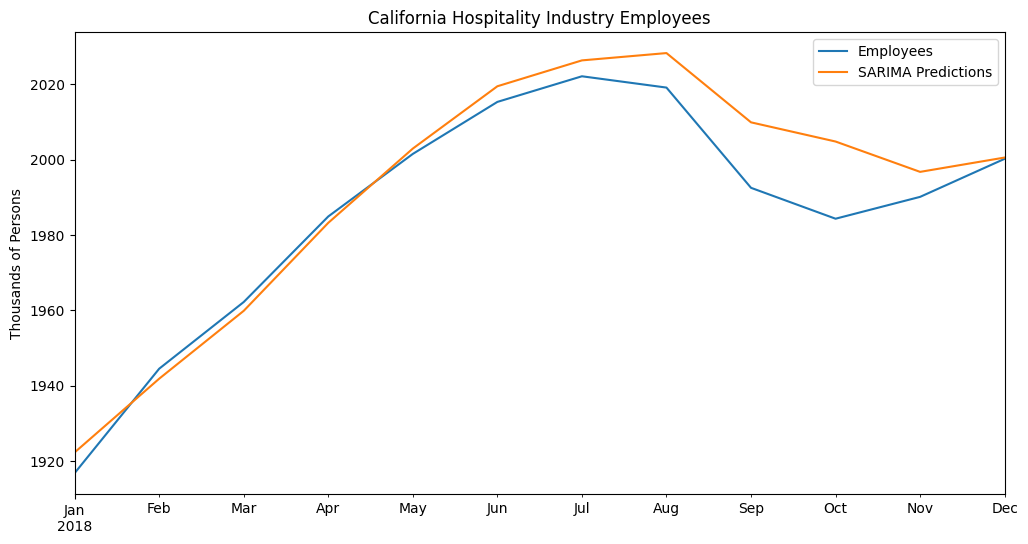

In [10]:
## CODE HERE
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''

ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title)
predictions.plot(legend = True)
ax.autoscale(axis ='x', tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);

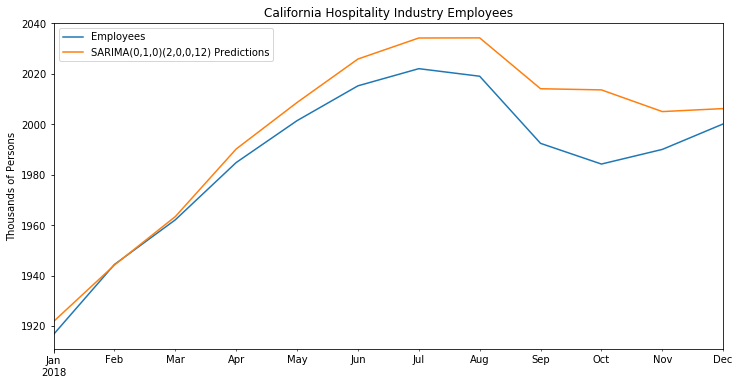

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [11]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Employees'], predictions)
print(f'SARIMA(1,1,2)(1,0,1,12) MSE Error: {error:11.10}')

from statsmodels.tools.eval_measures import rmse

error = rmse(test['Employees'], predictions)
print(f'SARIMA(1,1,2)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(1,1,2)(1,0,1,12) MSE Error: 77.66282837
SARIMA(1,1,2)(1,0,1,12) RMSE Error: 8.812651608


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [12]:
model = SARIMAX(df['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(1,1,2)(1,0,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80614D+00    |proj g|=  6.97483D+00

At iterate    5    f=  3.81314D+00    |proj g|=  5.08436D-02

At iterate   10    f=  3.27945D+00    |proj g|=  2.33551D-01

At iterate   15    f=  3.18051D+00    |proj g|=  2.98349D-02

At iterate   20    f=  3.15944D+00    |proj g|=  7.75717D-03


 This problem is unconstrained.



At iterate   25    f=  3.15714D+00    |proj g|=  4.64617D-03

At iterate   30    f=  3.15590D+00    |proj g|=  6.36401D-04

At iterate   35    f=  3.15590D+00    |proj g|=  6.35610D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     48      1     0     0   6.356D-05   3.156D+00
  F =   3.1558968386294528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

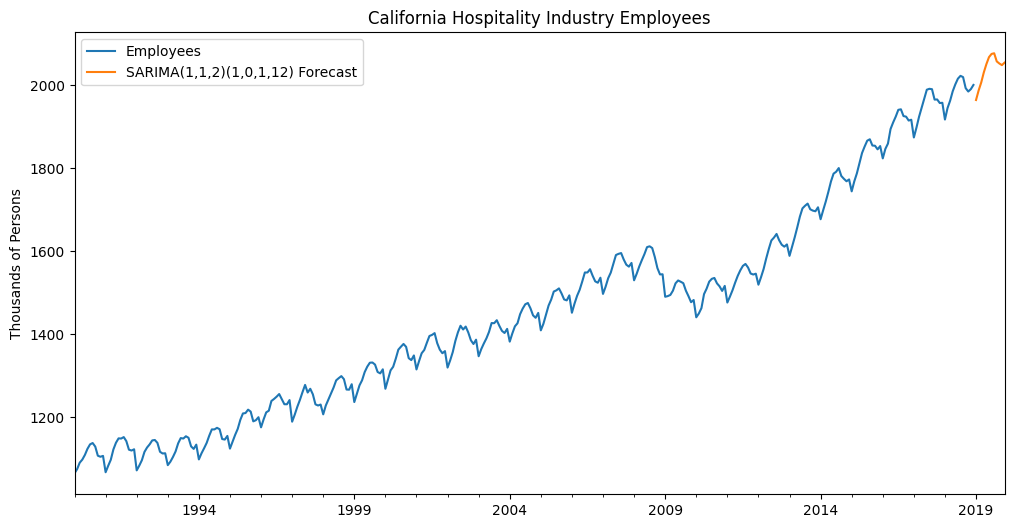

In [13]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = ''

ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title)
fcast .plot(legend = True)
ax.autoscale(axis ='x', tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);

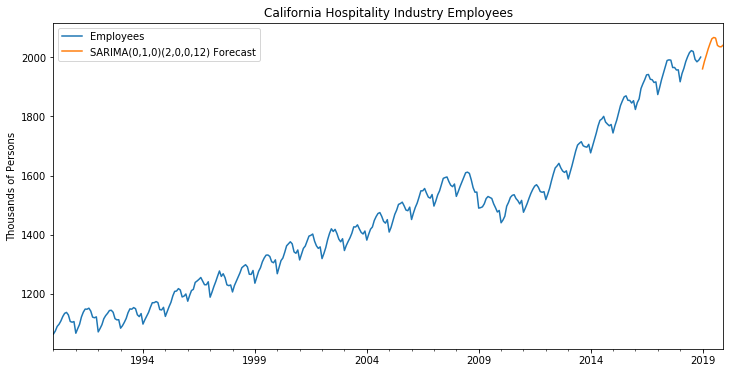

In [11]:
# DON'T WRITE HERE

## Great job!